# 新词分析 #

In [86]:
%matplotlib inline
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(10,7)

dataPath = "../"
newWordFile = "../../test/ans/total.txt.src.nw"
unknowFile = "unknown.info"
recallFile = dataPath + "WordCRF.nw.ap.r"
preFile = dataPath + "WordCRF.nw.ap.p"

dis = pd.read_csv(newWordFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
#dis = pd.read_csv(newWordFile+"Dis", sep="\\s+", names=["word", "type","length", "pos", "tf", "pmi", "le", "re"])
#src0 = pd.read_csv(unknowFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])



recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "answer"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "seg", "length", "pos", "tf", "pmi", "le", "re", "tfPre", "nothing", "label","answer"])

def label(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')
    return ax


print(mpl.rcParams['figure.figsize'])

[10.0, 7.0]


Int64Index([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


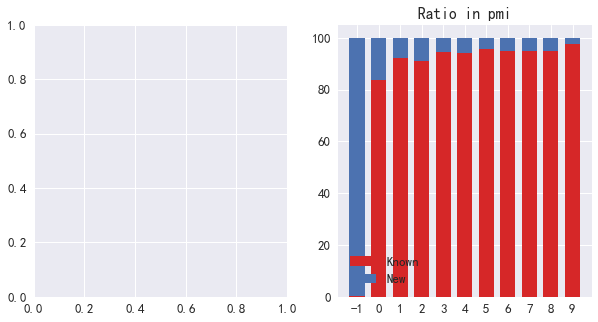

In [95]:
tag="pmi"
tmp=info#[info["length"] < 10]
yes = tmp[tmp["new"].str.contains("yes")][tag].value_counts().sort_index()
no = tmp[tmp["new"].str.contains("no")][tag].value_counts().sort_index()
totals = [i+j for i,j in zip(yes, no)]
# Create the percentage of the total score the pre_score value for each participant was
yes_rel = [i / j * 100 for  i,j in zip(yes, totals)]
# Create the percentage of the total score the mid_score value for each participant was
no_rel = [i / j * 100 for  i,j in zip(no, totals)]

f, axs = plt.subplots(figsize=(10,5), ncols=2)
ax=axs[1]
print(yes.index)
N = len(yes)
ind = np.arange(N)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence
p1 = ax.bar(ind, no_rel, width, color='#d62728')
p2 = ax.bar(ind, yes_rel, width,bottom=no_rel)
#ax.ylabel('Percentage')
ax.set_title('Ratio in ' + tag)
plt.xticks(ind, yes.index)
#ax.set_xticks(ind, yes.index)
#ax.set_yticklabels(np.arange(0, 100, 10))
ax.legend((p1[0], p2[0]), ('Known', 'New'))
#plt.show()

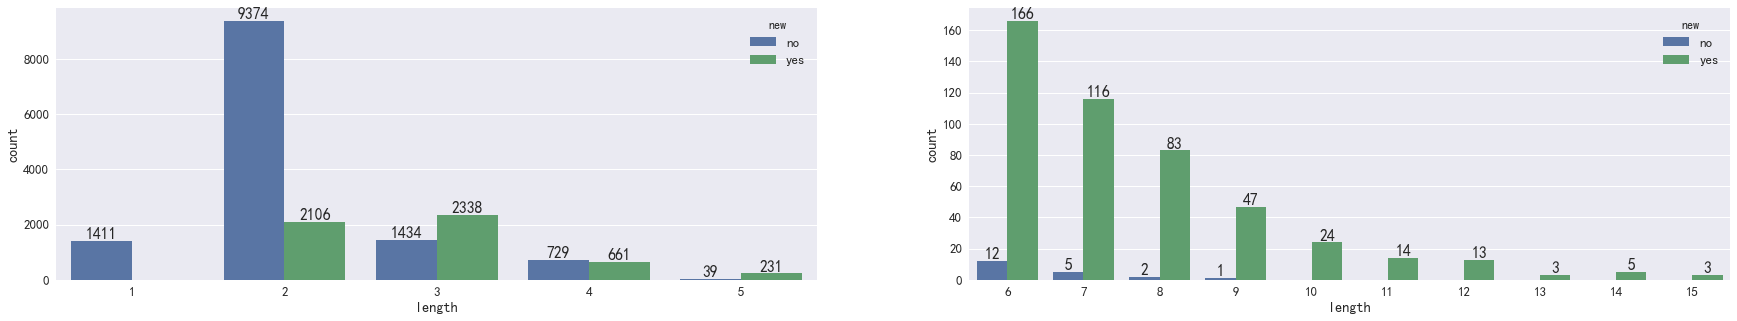

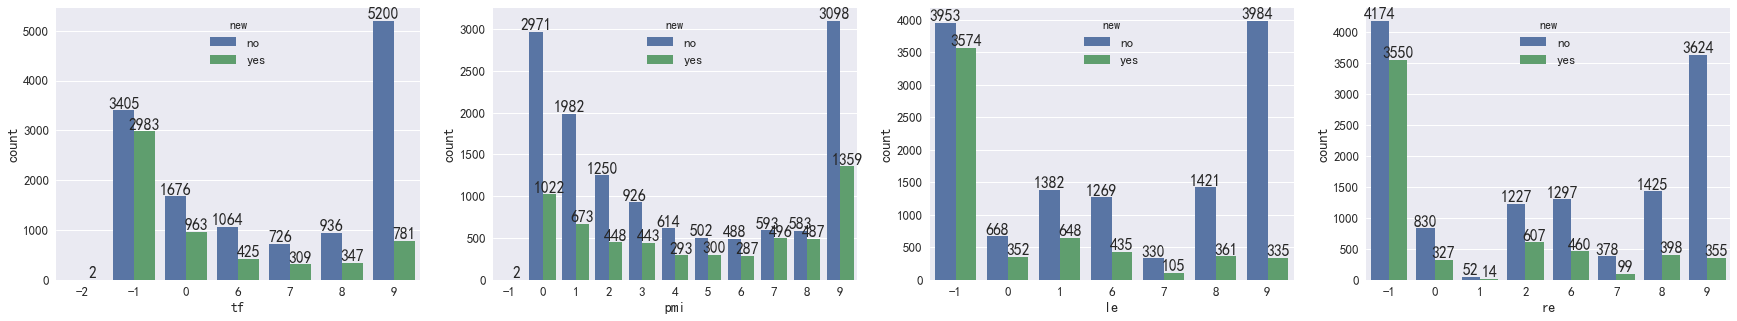

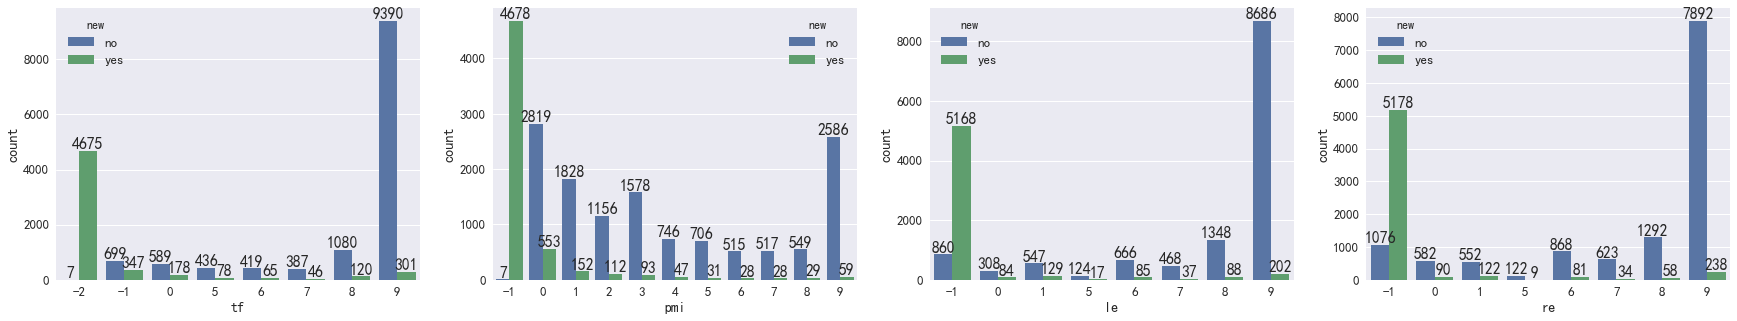

In [92]:
linfo = pd.read_csv("../word.local.info", sep="\\s+", names=["word", "length", "tf", "pmi", "le", "re", "new"])
ginfo = pd.read_csv("../word.renmin.info", sep="\\s+", names=["word", "length", "tf", "pmi", "le", "re", "new"])
info = linfo
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(30, 5)
label(sns.countplot(x="length", hue="new", data=info[info["length"] <= 5], ax=axs[0]))
label(sns.countplot(x="length", hue="new", data=info[info["length"] > 5], ax=axs[1], hue_order=["no", "yes"]))
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new", data=info, ax=axs[3]))

info = ginfo
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new", data=info, ax=axs[3]))

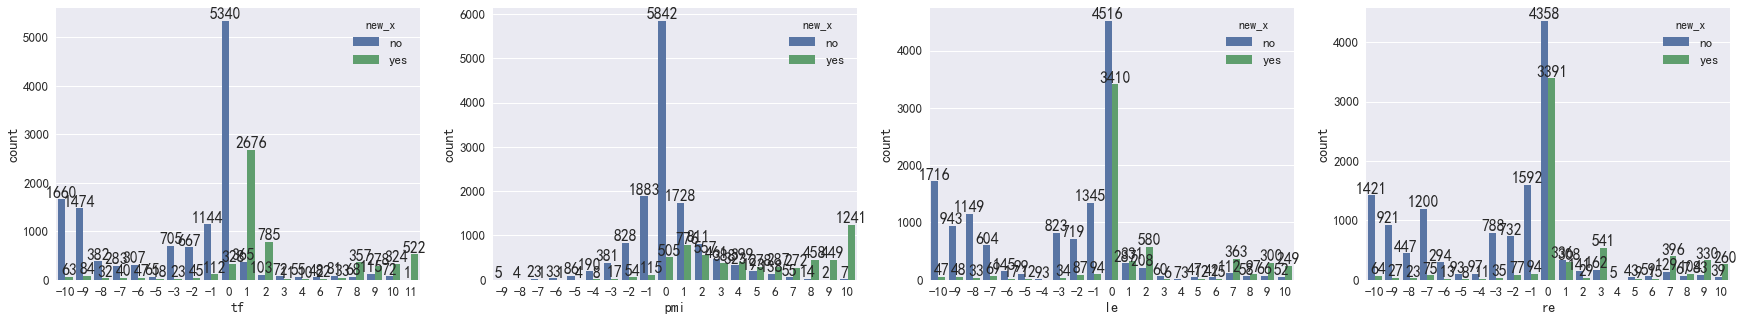

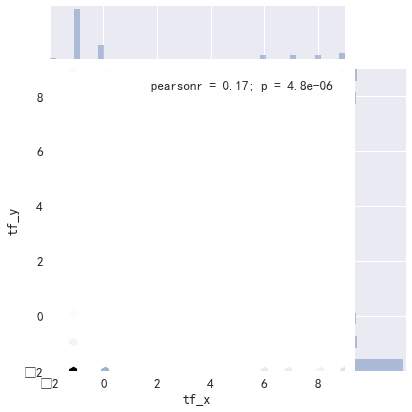

In [136]:
info = pd.merge(linfo, ginfo, on='word')
info["tf"]=info["tf_x"]-info["tf_y"]
info["pmi"]=info["pmi_x"]-info["pmi_y"]
info["le"]=info["le_x"]-info["le_y"]
info["re"]=info["re_x"]-info["re_y"]
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new_x", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new_x", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new_x", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new_x", data=info, ax=axs[3]))


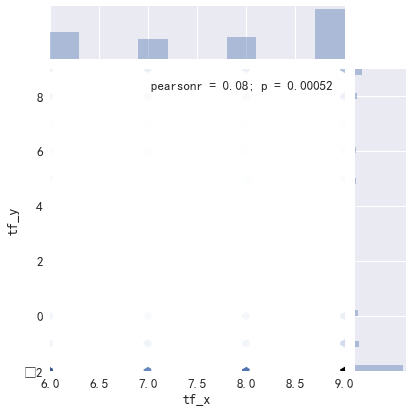

In [138]:
sns.jointplot(x="tf_x", y="tf_y", data=info[info["new_x"].str.contains("yes") & (info["tf_x"] >4 )], kind="hex")

In [148]:
info[info["new_x"].str.contains("yes") & (info["tf_x"]>5) & (info["tf_y"]<5)].shape

(1536, 17)

In [230]:
src[src["word"].str.contains("^\\d")]

,word,type,length,pos,tf,pmi,le,re
1011,０９４级,混合,4,n,-1,3,-1,-1
2408,７７４级,混合,4,n,-1,1,-1,-1
3573,０４１级,混合,4,n,-1,3,-1,-1
4067,９９师,混合,3,n,6,1,-1,-1
4071,１０５码,混合,4,ns,8,3,1,7
4188,５９Ｄ改型,混合,5,b,-1,5,-1,-1
4192,９７式,混合,3,b,-1,1,-1,-1
4216,５３式,混合,3,n,-1,1,-1,-1
4217,５６式,混合,3,n,8,3,0,7
4221,５４式,混合,3,n,-1,1,-1,-1


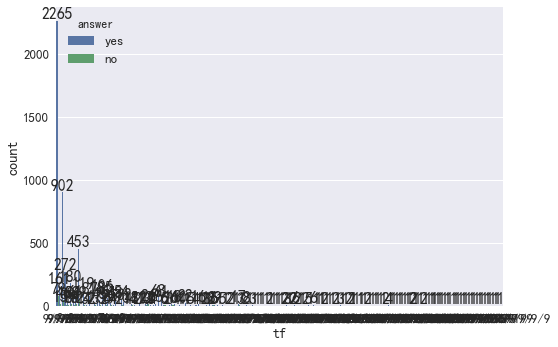

In [8]:
label(sns.countplot(x="tf",hue="answer", data=pre))

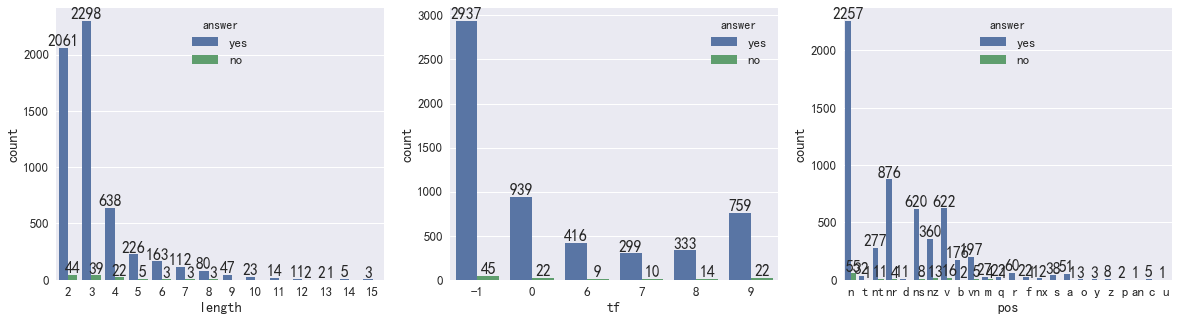

In [22]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
label(sns.countplot(x="length",hue="answer", data=recall, ax=axs[0]))
label(sns.countplot(x="tf",hue="answer", data=recall, ax=axs[1]))
label(sns.countplot(x="pos",hue="answer", data=recall, ax=axs[2]))

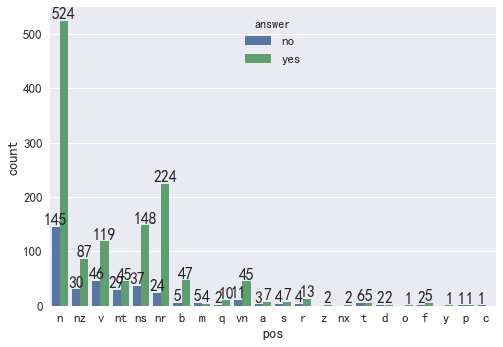

In [240]:
label(sns.countplot(x="pos",hue="answer", data=recall))

In [40]:
pre[pre["answer"].str.contains(".") & pre["word"].str.contains("茨") & pre["pos"].str.contains(".") & ~pre["pos"].str.contains("[li]")]

,word,seg,length,pos,tf,pmi,le,re,tfPre,nothing,label,answer


In [242]:
recall[recall["answer"].str.contains("no") & recall["pos"].str.contains("nr") & recall["word"].str.contains(".")  & (recall["tf"])]

,word,type,length,pos,tf,pmi,le,re,answer
22,麻生太郎,纯汉字,4,nr,-1,9,-1,-1,no
319,吞敏奈,纯汉字,3,nr,-1,9,-1,-1,no
489,申仁均,纯汉字,3,nr,-1,9,-1,-1,no
715,希沙姆丁·侯赛因,汉字加连字符斜杠分隔符,8,nr,-1,8,-1,-1,no
770,石川和秀,纯汉字,4,nr,-1,9,-1,-1,no
900,穆斯塔法·卡亚,汉字加连字符斜杠分隔符,7,nr,-1,8,-1,-1,no
938,文在寅,纯汉字,3,nr,7,9,1,8,no
1125,葛厦,纯汉字,2,nr,-1,9,-1,-1,no
1158,诺列加,纯汉字,3,nr,-1,7,-1,-1,no
1191,昌德,纯汉字,2,nr,-1,6,-1,-1,no


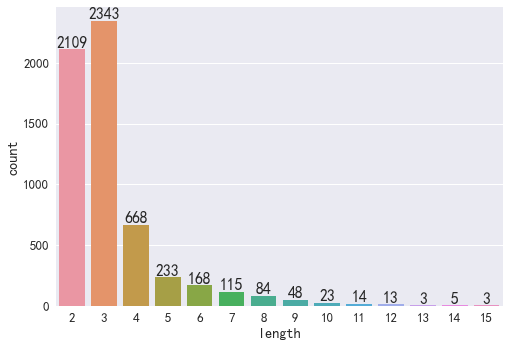

In [159]:
label(sns.countplot(src["length"]))

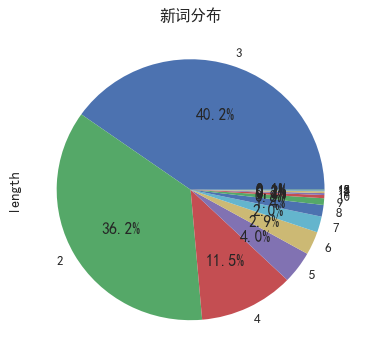

In [144]:
src["length"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")

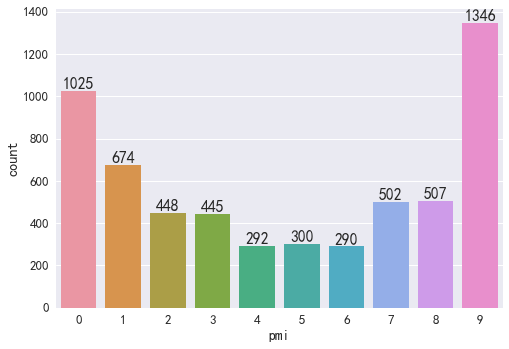

In [145]:
countplot(dis["pmi"]);

# 新词统计量

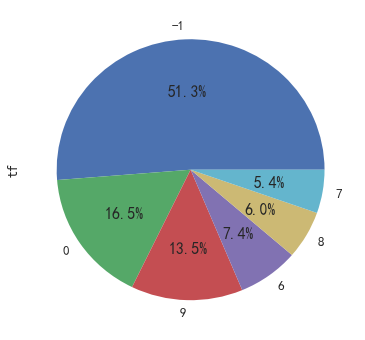

In [146]:
src["tf"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')

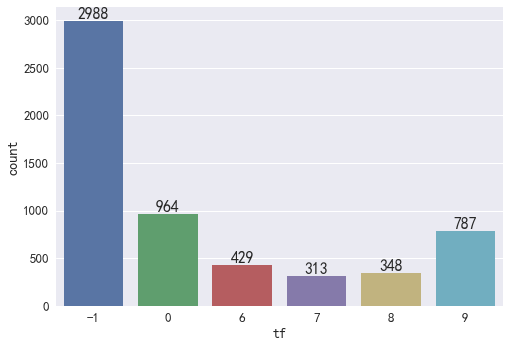

In [147]:
countplot(dis["tf"])

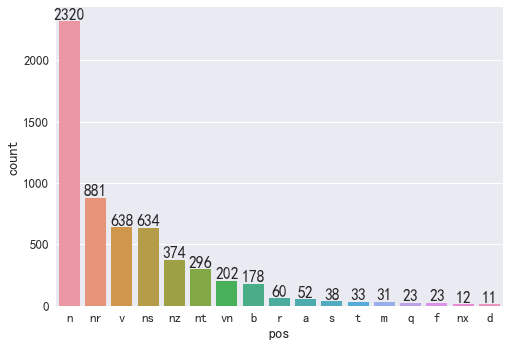

In [128]:
tmp = dis.groupby('pos').filter(lambda x: len(x) > 10)
ax = sns.countplot(tmp["pos"], order=tmp.groupby('pos').size().sort_values(ascending=False).index)
label(ax)

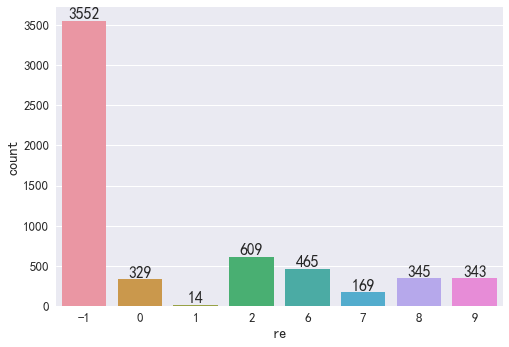

In [28]:
countplot(dis["re"])

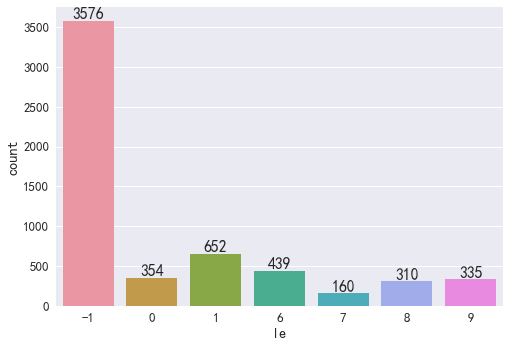

In [29]:
countplot(dis["le"])

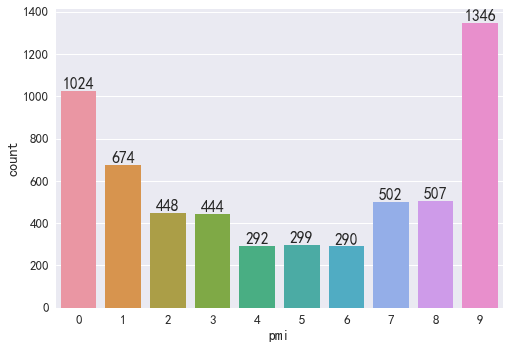

In [30]:
countplot(dis["pmi"])

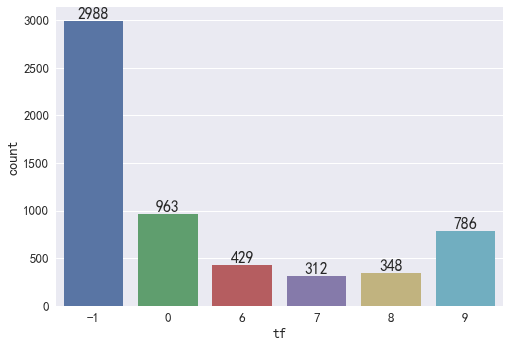

In [31]:
countplot(dis["tf"])

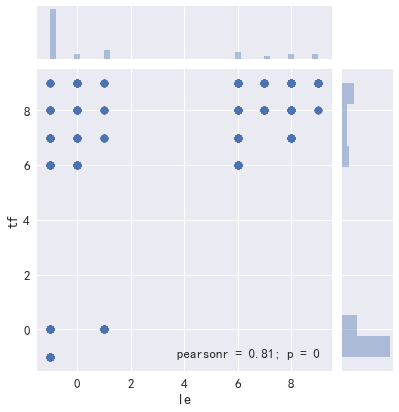

In [6]:
sns.jointplot(x="le", y="tf", data=dis)

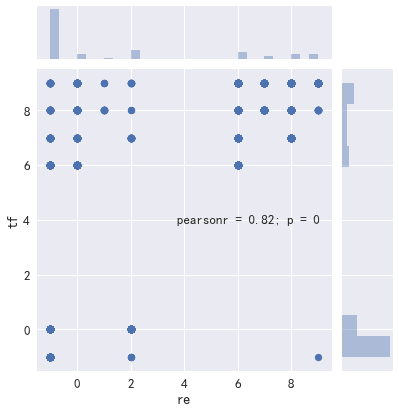

In [9]:
sns.jointplot(x="re", y="tf", data=dis)

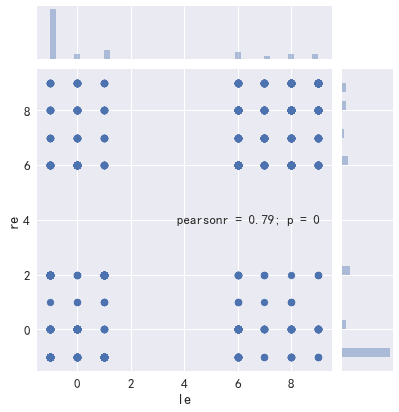

In [12]:
sns.jointplot(x="le", y="re", data=dis)

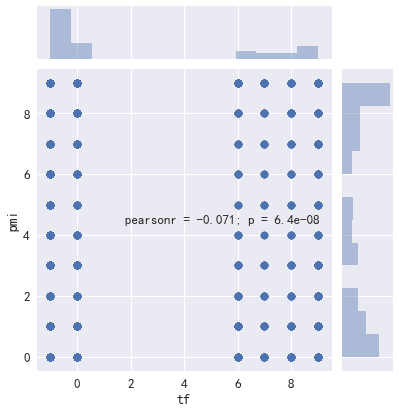

In [14]:
sns.jointplot(x="tf", y="pmi", data=dis)

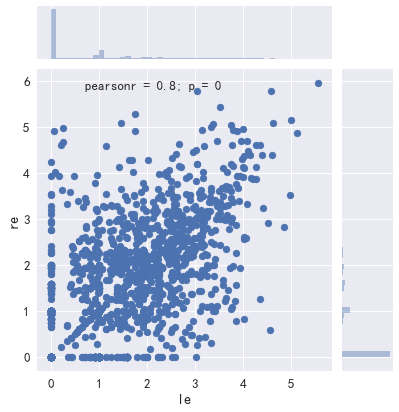

In [34]:
sns.jointplot(x="le", y="re", data=src)

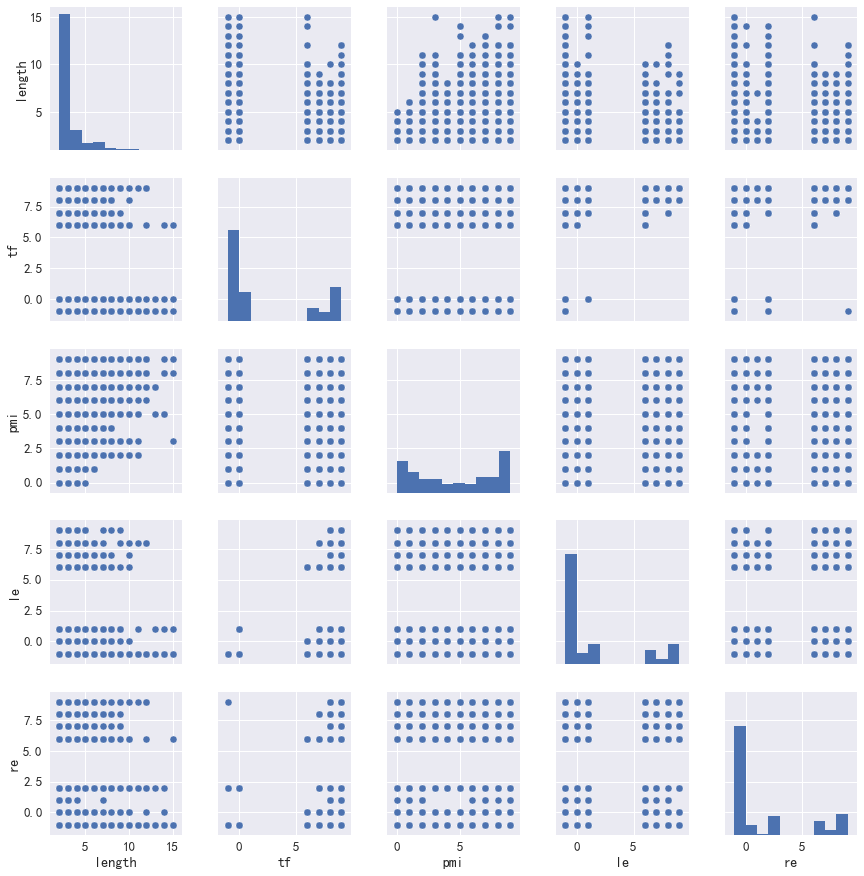

In [4]:
g = sns.pairplot(dis)

In [36]:
# src["pos"][src.groupby("pos").count() < 10]
src.groupby('pos').filter(lambda x: len(x) <= 12)

,word,type,length,pos,tf,pmi,le,re
234,既而,纯汉字,2,c,1,4.247928,0.000000,0.000000
261,尽管如此,纯汉字,4,c,5,10.546894,0.721928,0.000000
331,丛林地,纯汉字,3,u,1,7.087463,0.000000,0.000000
619,以致于,纯汉字,3,c,1,8.951285,0.000000,0.000000
706,而非,纯汉字,2,c,12,5.554589,1.584963,3.418296
1302,歼－１５,混合,4,nx,6,8.257388,1.792481,1.792481
1592,之于,纯汉字,2,p,1,-Infinity,0.000000,0.000000
1608,迄未,纯汉字,2,d,1,8.060696,0.000000,0.000000
1741,更是,纯汉字,2,d,21,4.000000,3.744239,4.201841
1797,野心勃勃,纯汉字,4,z,1,12.878817,0.000000,0.000000


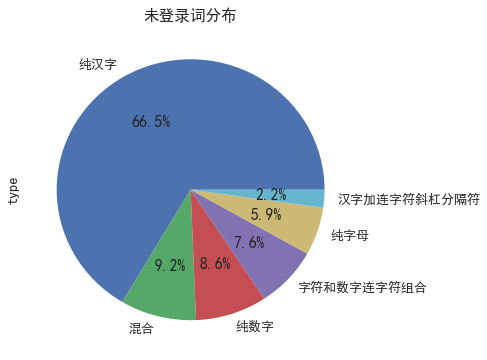

In [46]:
src0["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("未登录词分布")

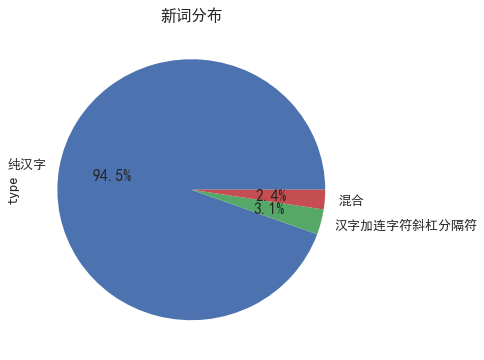

In [47]:
src["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")